In [40]:
import numpy as np
import pandas as pd

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import (
    StandardScaler,
    OneHotEncoder,
    OrdinalEncoder,
    LabelEncoder
)

from sklearn import set_config

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV

from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score
)

from sklearn.decomposition import PCA
from sklearn.metrics import ConfusionMatrixDisplay

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'D:\Projects\churn_project\data\churn_imputed.csv')
df.sample(4)

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
2380,3413-DHLPB,Male,0,Yes,Yes,60,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.75,5969.95,No
2464,2609-IAICY,Female,0,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,77.15,77.15,Yes
5671,6370-ZVHDV,Female,0,Yes,No,61,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),25.30,1554.90,No
3574,4634-JLRJT,Female,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.35,20.35,No


In [3]:
df = df.drop(columns = 'customerid', axis = 1)

In [4]:
df.sample(4)

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
1332,Male,0,No,No,69,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),23.95,1713.10,No
2749,Male,0,Yes,Yes,34,Yes,Yes,DSL,No,No,Yes,No,Yes,Yes,One year,No,Bank transfer (automatic),77.20,2753.80,No
1648,Male,1,Yes,Yes,60,Yes,Yes,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,80.95,4859.10,No
4318,Male,0,No,No,56,Yes,No,DSL,No,Yes,No,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),75.75,4284.65,No


In [5]:
df['partner'].value_counts(), df['dependents'].value_counts(), df['phoneservice'].value_counts(),  df['paperlessbilling'].value_counts()

(partner
 No     3641
 Yes    3402
 Name: count, dtype: int64,
 dependents
 No     4933
 Yes    2110
 Name: count, dtype: int64,
 phoneservice
 Yes    6361
 No      682
 Name: count, dtype: int64,
 paperlessbilling
 Yes    4171
 No     2872
 Name: count, dtype: int64)

In [6]:
df['multiplelines'].value_counts(), df['onlinesecurity'].value_counts(), df['internetservice'].value_counts()

(multiplelines
 No                  3390
 Yes                 2971
 No phone service     682
 Name: count, dtype: int64,
 onlinesecurity
 No                     3498
 Yes                    2019
 No internet service    1526
 Name: count, dtype: int64,
 internetservice
 Fiber optic    3096
 DSL            2421
 No             1526
 Name: count, dtype: int64)

In [7]:
df['onlinebackup'].value_counts(), df['techsupport'].value_counts(), df['deviceprotection'].value_counts()

(onlinebackup
 No                     3088
 Yes                    2429
 No internet service    1526
 Name: count, dtype: int64,
 techsupport
 No                     3473
 Yes                    2044
 No internet service    1526
 Name: count, dtype: int64,
 deviceprotection
 No                     3095
 Yes                    2422
 No internet service    1526
 Name: count, dtype: int64)

In [8]:
df['contract'].value_counts(), df['paymentmethod'].value_counts()

(contract
 Month-to-month    3875
 Two year          1695
 One year          1473
 Name: count, dtype: int64,
 paymentmethod
 Electronic check             2365
 Mailed check                 1612
 Bank transfer (automatic)    1544
 Credit card (automatic)      1522
 Name: count, dtype: int64)

In [9]:
df.columns

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [10]:
import copy

test_df = copy.copy(df.drop(columns = ['streamingtv', 'streamingmovies', 'totalcharges']))

In [11]:
test_df.sample(4)

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,contract,paperlessbilling,paymentmethod,monthlycharges,churn
2473,Female,0,Yes,Yes,6,Yes,No,No,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.85,No
5629,Male,1,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.05,Yes
2192,Male,1,Yes,No,56,Yes,No,DSL,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),85.65,No
598,Male,0,Yes,No,51,Yes,Yes,Fiber optic,No,Yes,No,No,One year,Yes,Credit card (automatic),90.35,No


In [12]:
test_df.churn.value_counts()

churn
No     5174
Yes    1869
Name: count, dtype: int64

# Split data before transformation

In [131]:
X = test_df.drop(columns = 'churn', axis = 1)
y = test_df['churn'].values

X.shape, y.shape

((7043, 16), (7043,))

In [132]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [133]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size = 0.2, stratify = y, random_state = 1)

print('The shape of training data is', X_train.shape)
print('The shape of testing data is', X_test.shape)

The shape of training data is (5634, 16)
The shape of testing data is (1409, 16)


In [134]:
X_train.sample()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,contract,paperlessbilling,paymentmethod,monthlycharges
4799,Female,0,Yes,Yes,10,Yes,No,No,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),19.8


# OneHotEncoding

In [116]:
set_config(transform_output='pandas')

In [117]:
df.columns

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [19]:
cat_2 = ['partner', 'dependents', 'phoneservice', 'paperlessbilling']
cat_3 = ['multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport']
cat_4 = ['contract', 'paymentmethod']

In [20]:
# Creating a column transformer for preprocessing

preprocessor = ColumnTransformer(
    transformers = [

        ('cat_2', OneHotEncoder(drop = 'first', sparse_output=False), ['gender', 'partner', 'dependents', 'phoneservice', 'paperlessbilling']),
        ('cat_3', OneHotEncoder(drop = 'first', sparse_output=False), ['multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport']),
        ('cat_4', OneHotEncoder(drop = 'first', sparse_output=False), ['contract', 'paymentmethod']),
        ('charges', StandardScaler(), ['monthlycharges']),
        
    ], remainder = 'passthrough', force_int_remainder_cols = False
    
)

In [21]:
preprocessor

ColumnTransformer(force_int_remainder_cols=False, remainder='passthrough',
                  transformers=[('cat_2',
                                 OneHotEncoder(drop='first',
                                               sparse_output=False),
                                 ['gender', 'partner', 'dependents',
                                  'phoneservice', 'paperlessbilling']),
                                ('cat_3',
                                 OneHotEncoder(drop='first',
                                               sparse_output=False),
                                 ['multiplelines', 'internetservice',
                                  'onlinesecurity', 'onlinebackup',
                                  'deviceprotection', 'techsupport']),
                                ('cat_4',
                                 OneHotEncoder(drop='first',
                                               sparse_output=False),
                                 ['contract', 'paymentmethod']),
                                ('charges', StandardScaler(),
                                 ['monthlycharges'])])

In [22]:
# fit and transform the training data
preprocessor.fit_transform(X_train)

,cat_2__gender_Male,cat_2__partner_Yes,cat_2__dependents_Yes,cat_2__phoneservice_Yes,cat_2__paperlessbilling_Yes,cat_3__multiplelines_No phone service,cat_3__multiplelines_Yes,cat_3__internetservice_Fiber optic,cat_3__internetservice_No,cat_3__onlinesecurity_No internet service,...,cat_3__techsupport_No internet service,cat_3__techsupport_Yes,cat_4__contract_One year,cat_4__contract_Two year,cat_4__paymentmethod_Credit card (automatic),cat_4__paymentmethod_Electronic check,cat_4__paymentmethod_Mailed check,charges__monthlycharges,remainder__seniorcitizen,remainder__tenure
2246,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.252068,0,1
6843,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.895785,0,9
159,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.303514,0,10
6259,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.402982,0,60
4291,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.513454,0,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1538,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.198792,0,8
3935,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,-1.498304,0,70
1128,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.513288,0,27
318,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.942402,1,24


# Model pipeline

In [66]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [81]:
# build the model pipeline

model_params = {'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': 0.8,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 400,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 30,
 'verbose': 0,
 'warm_start': False}

In [82]:
model_pipe = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('clf',RandomForestClassifier(**model_params))
])

model_pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('cat_2',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['gender', 'partner',
                                                   'dependents', 'phoneservice',
                                                   'paperlessbilling']),
                                                 ('cat_3',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['multiplelines',
                                                   'internetservice',
                                                   'onlinesecurity',
                                                   'onlinebackup',
                                                   'deviceprotection',
                                                   'techsupport']),
                                                 ('cat_4',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['contract',
                                                   'paymentmethod']),
                                                 ('charges', StandardScaler(),
                                                  ['monthlycharges'])])),
                ('clf',
                 RandomForestClassifier(max_samples=0.8, n_estimators=400,
                                        n_jobs=-1, random_state=30))])

In [83]:
model_pipe.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('cat_2',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['gender', 'partner',
                                                   'dependents', 'phoneservice',
                                                   'paperlessbilling']),
                                                 ('cat_3',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['multiplelines',
                                                   'internetservice',
                                                   'onlinesecurity',
                                                   'onlinebackup',
                                                   'deviceprotection',
                                                   'techsupport']),
                                                 ('cat_4',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['contract',
                                                   'paymentmethod']),
                                                 ('charges', StandardScaler(),
                                                  ['monthlycharges'])])),
                ('clf',
                 RandomForestClassifier(max_samples=0.8, n_estimators=400,
                                        n_jobs=-1, random_state=30))])

In [84]:
y_pred = model_pipe.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred).item()
recall = recall_score(y_test,y_pred).item()
f1 = f1_score(y_test,y_pred).item()

In [85]:
accuracy, precision, recall, f1

(0.78708303761533, 0.6312056737588653, 0.47593582887700536, 0.5426829268292683)

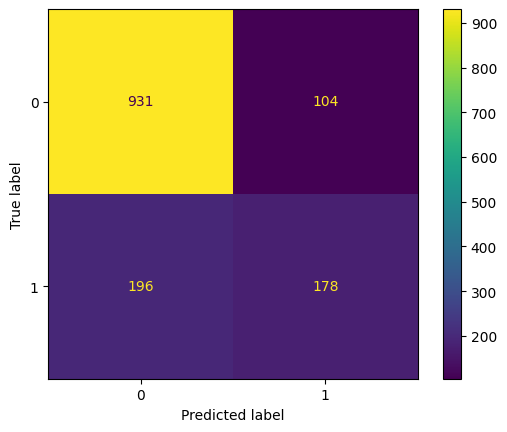

In [86]:
# plot confusion matrix

cm = ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [88]:
# K-fold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(model_pipe, X_train, y_train, cv=kfold, scoring='accuracy')

In [89]:
scores.mean()

0.7891340085408716

In [90]:
scores.std()

0.01694025995473803

In [100]:
def scorer(model_name, model):
    
    output = []
    
    output.append(model_name)
    
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('clf', model)
    ])
    
    # K-fold cross-validation
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    scores = cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring='accuracy')
    
    pipeline.fit(X_train,y_train)
    
    y_pred = pipeline.predict(X_test)

    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred).item()
    recall = recall_score(y_test,y_pred).item()
    f1 = f1_score(y_test,y_pred).item()

    output.append(accuracy_score(y_test, y_pred))
    output.append(precision_score(y_test, y_pred).item())
    output.append(recall_score(y_test, y_pred).item())
    output.append(f1_score(y_test, y_pred).item())
    
    return output

In [101]:
model_dict = {'knn' : KNeighborsClassifier(),
    'svc' : SVC(),
    'decision tree' : DecisionTreeClassifier(),
    'random forest':RandomForestClassifier(),
    'extra trees': ExtraTreesClassifier(),
    'gradient boosting': GradientBoostingClassifier(),
    'adaboost': AdaBoostClassifier()
}

In [106]:
model_output = []
for model_name, model in model_dict.items():
    model_output.append(scorer(model_name, model))

In [107]:
model_df = pd.DataFrame(model_output, columns=['name','accuracy','precision', 'recall', 'f1'])

In [108]:
model_df.sort_values(['accuracy'])

,name,accuracy,precision,recall,f1
2,decision tree,0.740241,0.510526,0.518717,0.514589
0,knn,0.763662,0.562310,0.494652,0.526316
4,extra trees,0.766501,0.573290,0.470588,0.516887
3,random forest,0.777857,0.606272,0.465241,0.526475
1,svc,0.792051,0.669456,0.427807,0.522023
6,adaboost,0.798439,0.650000,0.521390,0.578635
5,gradient boosting,0.805536,0.679856,0.505348,0.579755


In [109]:
# Creating a column transformer for preprocessing

preprocessor_2 = ColumnTransformer(
    transformers = [

        ('cat_2', OneHotEncoder(drop = 'first', sparse_output=False), ['gender', 'partner', 'dependents', 'phoneservice', 'paperlessbilling']),
        ('cat_3', OrdinalEncoder(), ['multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport']),
        ('cat_4', OrdinalEncoder(), ['contract', 'paymentmethod']),
        ('charges', StandardScaler(), ['monthlycharges']),
        
    ], remainder = 'passthrough', force_int_remainder_cols = False
    
)

In [110]:
preprocessor_2

ColumnTransformer(force_int_remainder_cols=False, remainder='passthrough',
                  transformers=[('cat_2',
                                 OneHotEncoder(drop='first',
                                               sparse_output=False),
                                 ['gender', 'partner', 'dependents',
                                  'phoneservice', 'paperlessbilling']),
                                ('cat_3', OrdinalEncoder(),
                                 ['multiplelines', 'internetservice',
                                  'onlinesecurity', 'onlinebackup',
                                  'deviceprotection', 'techsupport']),
                                ('cat_4', OrdinalEncoder(),
                                 ['contract', 'paymentmethod']),
                                ('charges', StandardScaler(),
                                 ['monthlycharges'])])

In [111]:
# fit and transform the training data
preprocessor_2.fit_transform(X_train)

,cat_2__gender_Male,cat_2__partner_Yes,cat_2__dependents_Yes,cat_2__phoneservice_Yes,cat_2__paperlessbilling_Yes,cat_3__multiplelines,cat_3__internetservice,cat_3__onlinesecurity,cat_3__onlinebackup,cat_3__deviceprotection,cat_3__techsupport,cat_4__contract,cat_4__paymentmethod,charges__monthlycharges,remainder__seniorcitizen,remainder__tenure
2246,0.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,0.0,2.0,0.0,0.0,2.0,1.252068,0,1
6843,0.0,1.0,0.0,1.0,0.0,2.0,1.0,2.0,2.0,2.0,0.0,0.0,0.0,0.895785,0,9
159,1.0,0.0,0.0,1.0,0.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,0.0,-1.303514,0,10
6259,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,2.0,0.0,0.402982,0,60
4291,0.0,1.0,1.0,1.0,0.0,2.0,1.0,2.0,2.0,0.0,2.0,2.0,0.0,1.513454,0,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1538,1.0,0.0,0.0,1.0,0.0,2.0,1.0,0.0,2.0,0.0,0.0,0.0,2.0,1.198792,0,8
3935,0.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,-1.498304,0,70
1128,1.0,0.0,0.0,1.0,1.0,0.0,2.0,1.0,1.0,1.0,1.0,0.0,2.0,-1.513288,0,27
318,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,2.0,0.942402,1,24


In [113]:
def scorer(model_name, model):
    
    output = []
    
    output.append(model_name)
    
    pipeline = Pipeline([
        ('preprocessor', preprocessor_2),
        ('clf', model)
    ])
    
    # K-fold cross-validation
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    scores = cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring='accuracy')
    
    pipeline.fit(X_train,y_train)
    
    y_pred = pipeline.predict(X_test)

    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred).item()
    recall = recall_score(y_test,y_pred).item()
    f1 = f1_score(y_test,y_pred).item()

    output.append(accuracy_score(y_test, y_pred))
    output.append(precision_score(y_test, y_pred).item())
    output.append(recall_score(y_test, y_pred).item())
    output.append(f1_score(y_test, y_pred).item())
    
    return output

In [114]:
model_output = []
for model_name, model in model_dict.items():
    model_output.append(scorer(model_name, model))

In [115]:
model_df_1 = pd.DataFrame(model_output, columns=['name','accuracy','precision', 'recall', 'f1'])

In [116]:
model_df_1.sort_values(['accuracy'])

,name,accuracy,precision,recall,f1
2,decision tree,0.713982,0.462725,0.481283,0.471822
4,extra trees,0.762243,0.564356,0.457219,0.505170
0,knn,0.776437,0.587537,0.529412,0.556962
3,random forest,0.787083,0.630282,0.478610,0.544073
1,svc,0.792761,0.665323,0.441176,0.530547
6,adaboost,0.795600,0.644295,0.513369,0.571429
5,gradient boosting,0.809084,0.688172,0.513369,0.588055


In [118]:
def scorer(model_name, model):
    
    output = []
    
    output.append(model_name)
    
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('pca', PCA(n_components=0.95)),
        ('clf', model)
    ])
    
    # K-fold cross-validation
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    scores = cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring='accuracy')
    
    pipeline.fit(X_train,y_train)
    
    y_pred = pipeline.predict(X_test)

    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred).item()
    recall = recall_score(y_test,y_pred).item()
    f1 = f1_score(y_test,y_pred).item()

    output.append(accuracy_score(y_test, y_pred))
    output.append(precision_score(y_test, y_pred).item())
    output.append(recall_score(y_test, y_pred).item())
    output.append(f1_score(y_test, y_pred).item())
    
    return output

In [119]:
model_output = []
for model_name, model in model_dict.items():
    model_output.append(scorer(model_name, model))

In [120]:
model_df_2 = pd.DataFrame(model_output, columns=['name','accuracy','precision', 'recall', 'f1'])

In [121]:
model_df_2.sort_values(['accuracy'])

,name,accuracy,precision,recall,f1
4,extra trees,0.690561,0.417989,0.422460,0.420213
2,decision tree,0.691270,0.419948,0.427807,0.423841
3,random forest,0.691980,0.421466,0.430481,0.425926
0,knn,0.750887,0.541516,0.401070,0.460829
1,svc,0.755145,0.557312,0.377005,0.449761
6,adaboost,0.760114,0.645161,0.213904,0.321285
5,gradient boosting,0.764372,0.650000,0.243316,0.354086


# Voting classifier

In [130]:
from sklearn.ensemble import VotingClassifier

clf1 = GradientBoostingClassifier()
clf2 = AdaBoostClassifier()

In [131]:
voting_pipe = Pipeline(
    steps = [
        ('preprocessor', preprocessor),
        ('voting',  VotingClassifier(estimators=[('GradientBoost', clf1), ('AdaBoost', clf2)], voting='soft'))
    ]
)

voting_pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('cat_2',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['gender', 'partner',
                                                   'dependents', 'phoneservice',
                                                   'paperlessbilling']),
                                                 ('cat_3',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['multiplelines',
                                                   'internetservice',
                                                   'onlinesecurity',
                                                   'onlinebackup',
                                                   'deviceprotection',
                                                   'techsupport']),
                                                 ('cat_4',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['contract',
                                                   'paymentmethod']),
                                                 ('charges', StandardScaler(),
                                                  ['monthlycharges'])])),
                ('voting',
                 VotingClassifier(estimators=[('GradientBoost',
                                               GradientBoostingClassifier()),
                                              ('AdaBoost',
                                               AdaBoostClassifier())],
                                  voting='soft'))])

In [132]:
# fit the model on the training data

voting_pipe.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('cat_2',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['gender', 'partner',
                                                   'dependents', 'phoneservice',
                                                   'paperlessbilling']),
                                                 ('cat_3',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['multiplelines',
                                                   'internetservice',
                                                   'onlinesecurity',
                                                   'onlinebackup',
                                                   'deviceprotection',
                                                   'techsupport']),
                                                 ('cat_4',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['contract',
                                                   'paymentmethod']),
                                                 ('charges', StandardScaler(),
                                                  ['monthlycharges'])])),
                ('voting',
                 VotingClassifier(estimators=[('GradientBoost',
                                               GradientBoostingClassifier()),
                                              ('AdaBoost',
                                               AdaBoostClassifier())],
                                  voting='soft'))])

In [133]:
# evaluate the model on the test data

voting_y_pred = voting_pipe.predict(X_test)

voting_accuracy = accuracy_score(y_test, voting_y_pred)
voting_precision = precision_score(y_test, voting_y_pred).item()
voting_recall = recall_score(y_test, voting_y_pred).item()
voting_f1 = f1_score(y_test, voting_y_pred).item()

In [134]:
# metrics dict

voting_metrics = {
    'accuracy': voting_accuracy,
    'precision': voting_precision,
    'recall': voting_recall,
    'f1_score': voting_f1
}

voting_metrics

{'accuracy': 0.8055358410220014,
 'precision': 0.6798561151079137,
 'recall': 0.5053475935828877,
 'f1_score': 0.5797546012269938}

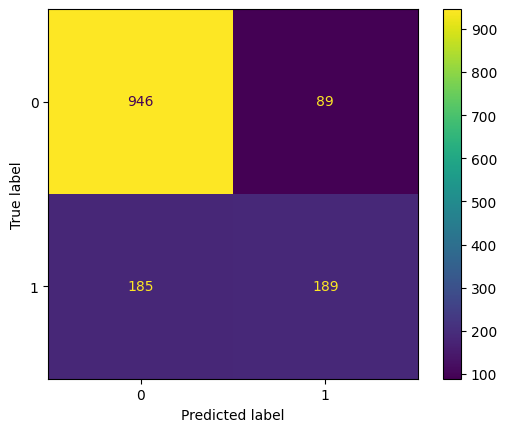

In [135]:
# plot confusion matrix

cm = ConfusionMatrixDisplay.from_predictions(y_test, voting_y_pred)

# Ada boost

In [23]:
AdaBoostClassifier().get_params()

{'algorithm': 'SAMME.R',
 'estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

In [446]:
# estimator = SVC()

In [24]:
model_params = {
    'algorithm' : 'SAMME',
    'estimator' : None,
    'learning_rate' : 2,
    'n_estimators' : 30,
    'random_state' : None
}

In [25]:
model_params

{'algorithm': 'SAMME',
 'estimator': None,
 'learning_rate': 2,
 'n_estimators': 30,
 'random_state': None}

In [26]:
adaboost_pipe = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('clf',AdaBoostClassifier(**model_params))
])

adaboost_pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('cat_2',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['gender', 'partner',
                                                   'dependents', 'phoneservice',
                                                   'paperlessbilling']),
                                                 ('cat_3',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['multiplelines',
                                                   'internetservice',
                                                   'onlinesecurity',
                                                   'onlinebackup',
                                                   'deviceprotection',
                                                   'techsupport']),
                                                 ('cat_4',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['contract',
                                                   'paymentmethod']),
                                                 ('charges', StandardScaler(),
                                                  ['monthlycharges'])])),
                ('clf',
                 AdaBoostClassifier(algorithm='SAMME', learning_rate=2,
                                    n_estimators=30))])

In [27]:
# fit the model on the training data

adaboost_pipe.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('cat_2',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['gender', 'partner',
                                                   'dependents', 'phoneservice',
                                                   'paperlessbilling']),
                                                 ('cat_3',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['multiplelines',
                                                   'internetservice',
                                                   'onlinesecurity',
                                                   'onlinebackup',
                                                   'deviceprotection',
                                                   'techsupport']),
                                                 ('cat_4',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['contract',
                                                   'paymentmethod']),
                                                 ('charges', StandardScaler(),
                                                  ['monthlycharges'])])),
                ('clf',
                 AdaBoostClassifier(algorithm='SAMME', learning_rate=2,
                                    n_estimators=30))])

In [28]:
# evaluate the model on the test data

adaboost_y_pred = adaboost_pipe.predict(X_test)

adaboost_accuracy = accuracy_score(y_test, adaboost_y_pred)
adaboost_precision = precision_score(y_test, adaboost_y_pred).item()
adaboost_recall = recall_score(y_test, adaboost_y_pred).item()
adaboost_f1 = f1_score(y_test, adaboost_y_pred).item()

In [29]:
# metrics dict

metrics = {
    'accuracy': adaboost_accuracy,
    'precision': adaboost_precision,
    'recall': adaboost_recall,
    'f1_score': adaboost_f1
}

metrics

{'accuracy': 0.47977288857345635,
 'precision': 0.33425669436749766,
 'recall': 0.9679144385026738,
 'f1_score': 0.4969114619080302}

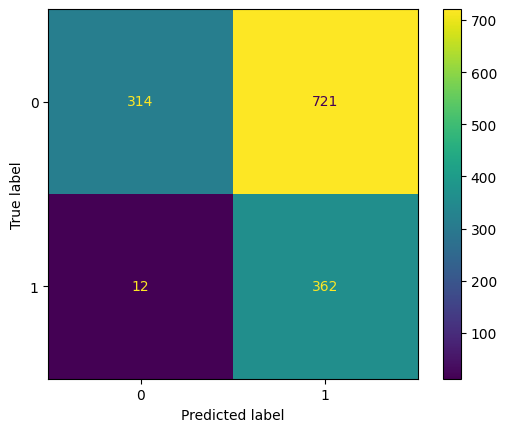

In [30]:
# plot confusion matrix

cm = ConfusionMatrixDisplay.from_predictions(y_test, adaboost_y_pred)

# MLFlow Tracking code

In [31]:
adaboost_pipe.get_params()

{'memory': None,
 'steps': [('preprocessor',
   ColumnTransformer(force_int_remainder_cols=False, remainder='passthrough',
                     transformers=[('cat_2',
                                    OneHotEncoder(drop='first',
                                                  sparse_output=False),
                                    ['gender', 'partner', 'dependents',
                                     'phoneservice', 'paperlessbilling']),
                                   ('cat_3',
                                    OneHotEncoder(drop='first',
                                                  sparse_output=False),
                                    ['multiplelines', 'internetservice',
                                     'onlinesecurity', 'onlinebackup',
                                     'deviceprotection', 'techsupport']),
                                   ('cat_4',
                                    OneHotEncoder(drop='first',
                                         

In [33]:
# import mlflow

In [35]:
mlflow.set_tracking_uri('http://127.0.0.1:8000')

mlflow.set_experiment('Adaboost - Churn data')

with mlflow.start_run(run_name = 'Fourteen') as run:

    data_signature = mlflow.models.infer_signature(model_input = X_train, model_output = adaboost_pipe.predict(X_train))
    mlflow.log_params(adaboost_pipe.get_params())
    mlflow.log_metrics(metrics)

     # log the model
    mlflow.sklearn.log_model(sk_model = adaboost_pipe, artifact_path = 'models', signature = data_signature)
    mlflow.log_figure(cm.figure_, artifact_file = 'confusion_matrix.png')

2024/08/22 08:51:38 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fourteen at: http://127.0.0.1:8000/#/experiments/868205258991758480/runs/070e409bcff647e483c3466a37e77e68.
2024/08/22 08:51:38 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:8000/#/experiments/868205258991758480.


In [ ]:
mlflow.set_tracking_uri('http://127.0.0.1:8000')
mlflow.set_experiment('(Grid Search) Adaboost - Churn data')

mlflow.sklearn.autolog()

params_grid = {
    "clf__n_estimators": list(range(100,300,100)),
    "clf__max_depth": [2,3,4,5,6,7]
}

params_grid = {'clf__algorithm': ['SAMME', 'SAMME.R'],
               'clf__learning_rate': list(range(1, 3)),
               'clf__n_estimators': list(range(25, 50, 5)) }

with mlflow.start_run(run_name = 'outer', nested = True) as parent:

    grid_search = GridSearchCV(estimator = adaboost_pipe, 
                               param_grid = params_grid,
                               scoring = 'accuracy', 
                               cv = 3, 
                               n_jobs = -1, verbose = 0)

    grid_search.fit(X_train, y_train)

with mlflow.start_run(run_name = 'best model') as best:

    mlflow.log_params(grid_search.best_params_)
    mlflow.log_metric('best_accuracy', grid_search.best_score_)
    mlflow.sklearn.log_model(sk_model = grid_search.best_estimator_, artifact_path = 'best_model')

# Hyperopt

In [67]:
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK

In [68]:
space = {
    "clf__n_estimators": hp.uniform('clf__n_estimators', 25, 40),
    "clf__learning_rate": hp.uniform('clf__learning_rate', 1, 2)
}

In [60]:
# define the objective function

def objective(params):
    with mlflow.start_run(run_name = 'outer', nested = True) as parent:
        
        # log the current run parameters
        mlflow.log_params(params)
        
        # give the parameters as integers
        n_estimators = int(params['clf__n_estimators'])
        learning_rate = int(params['clf__learning_rate'])
        
        # train the model
        adaboost_pipe.named_steps['clf'].set_params(**{'n_estimators' : n_estimators, 'learning_rate' : learning_rate})

        adaboost_pipe.fit(X_train, y_train)
        
        # get the accuracy score
        y_pred = adaboost_pipe.predict(X_test)
        
        # log the score
        accuracy = accuracy_score(y_test, y_pred)
        
        mlflow.log_metric('accuracy_score',accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK}

In [92]:
# mlflow.set_tracking_uri('http://127.0.0.1:8000')
# mlflow.set_experiment("( Hyperopt - HP ) Adaboost - Churn data")

# mlflow.sklearn.autolog()

# with mlflow.start_run(run_name = 'HP-1 Run'):
#     # set the fmin function
#     trials = Trials()
    
#     best = fmin(fn = objective, 
#                 space = space, 
#                 algo = tpe.suggest, 
#                 max_evals = 50, 
#                 trials = trials)

In [69]:
# define the objective function

def objective_1(params):
        
    # give the parameters as integers
    n_estimators = int(params['clf__n_estimators'])
    learning_rate = int(params['clf__learning_rate'])
    
    # train the model
    adaboost_pipe.named_steps['clf'].set_params(**{'n_estimators' : n_estimators, 'learning_rate' : learning_rate})

    adaboost_pipe.fit(X_train, y_train)
    
    # get the accuracy score
    y_pred = adaboost_pipe.predict(X_test)
    
    # log the score
    accuracy = accuracy_score(y_test, y_pred)
        
    return {'loss': -accuracy, 'status': STATUS_OK}

In [71]:
best = fmin(fn = objective_1, 
            space = space, 
            algo = tpe.suggest, 
            max_evals = 50)

  0%|                                                                           | 0/50 [00:00<?, ?trial/s, best loss=?]

2024/08/22 12:04:19 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: API request to http://127.0.0.1:8000/api/2.0/mlflow/runs/create failed with exception HTTPConnectionPool(host='127.0.0.1', port=8000): Max retries exceeded with url: /api/2.0/mlflow/runs/create (Caused by ResponseError('too many 500 error responses'))



  2%|▉                                               | 1/50 [01:03<52:05, 63.79s/trial, best loss: -0.7899219304471257]

2024/08/22 12:05:22 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: API request to http://127.0.0.1:8000/api/2.0/mlflow/runs/create failed with exception HTTPConnectionPool(host='127.0.0.1', port=8000): Max retries exceeded with url: /api/2.0/mlflow/runs/create (Caused by ResponseError('too many 500 error responses'))



  4%|█▉                                              | 2/50 [02:07<50:53, 63.61s/trial, best loss: -0.7963094393186657]

2024/08/22 12:06:25 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: API request to http://127.0.0.1:8000/api/2.0/mlflow/runs/create failed with exception HTTPConnectionPool(host='127.0.0.1', port=8000): Max retries exceeded with url: /api/2.0/mlflow/runs/create (Caused by ResponseError('too many 500 error responses'))



  6%|██▉                                             | 3/50 [03:09<49:30, 63.20s/trial, best loss: -0.7963094393186657]

2024/08/22 12:07:28 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: API request to http://127.0.0.1:8000/api/2.0/mlflow/runs/create failed with exception HTTPConnectionPool(host='127.0.0.1', port=8000): Max retries exceeded with url: /api/2.0/mlflow/runs/create (Caused by ResponseError('too many 500 error responses'))



  8%|███▊                                            | 4/50 [04:12<48:22, 63.10s/trial, best loss: -0.7963094393186657]

2024/08/22 12:08:31 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: API request to http://127.0.0.1:8000/api/2.0/mlflow/runs/create failed with exception HTTPConnectionPool(host='127.0.0.1', port=8000): Max retries exceeded with url: /api/2.0/mlflow/runs/create (Caused by ResponseError('too many 500 error responses'))



 10%|████▊                                           | 5/50 [05:16<47:25, 63.24s/trial, best loss: -0.7963094393186657]

2024/08/22 12:09:35 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: API request to http://127.0.0.1:8000/api/2.0/mlflow/runs/create failed with exception HTTPConnectionPool(host='127.0.0.1', port=8000): Max retries exceeded with url: /api/2.0/mlflow/runs/create (Caused by ResponseError('too many 500 error responses'))



 12%|█████▊                                          | 6/50 [06:20<46:35, 63.53s/trial, best loss: -0.7963094393186657]

2024/08/22 12:10:39 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: API request to http://127.0.0.1:8000/api/2.0/mlflow/runs/create failed with exception HTTPConnectionPool(host='127.0.0.1', port=8000): Max retries exceeded with url: /api/2.0/mlflow/runs/create (Caused by ResponseError('too many 500 error responses'))



 14%|██████▋                                         | 7/50 [07:24<45:32, 63.56s/trial, best loss: -0.7970191625266146]

2024/08/22 12:11:44 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: API request to http://127.0.0.1:8000/api/2.0/mlflow/runs/create failed with exception HTTPConnectionPool(host='127.0.0.1', port=8000): Max retries exceeded with url: /api/2.0/mlflow/runs/create (Caused by ResponseError('too many 500 error responses'))



 16%|███████▋                                        | 8/50 [08:28<44:44, 63.91s/trial, best loss: -0.7970191625266146]

2024/08/22 12:12:47 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: API request to http://127.0.0.1:8000/api/2.0/mlflow/runs/create failed with exception HTTPConnectionPool(host='127.0.0.1', port=8000): Max retries exceeded with url: /api/2.0/mlflow/runs/create (Caused by ResponseError('too many 500 error responses'))



 18%|████████▋                                       | 9/50 [09:31<43:26, 63.58s/trial, best loss: -0.7998580553584103]

2024/08/22 12:13:50 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: API request to http://127.0.0.1:8000/api/2.0/mlflow/runs/create failed with exception HTTPConnectionPool(host='127.0.0.1', port=8000): Max retries exceeded with url: /api/2.0/mlflow/runs/create (Caused by ResponseError('too many 500 error responses'))



 20%|█████████▍                                     | 10/50 [10:35<42:20, 63.51s/trial, best loss: -0.7998580553584103]

2024/08/22 12:14:53 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: API request to http://127.0.0.1:8000/api/2.0/mlflow/runs/create failed with exception HTTPConnectionPool(host='127.0.0.1', port=8000): Max retries exceeded with url: /api/2.0/mlflow/runs/create (Caused by ResponseError('too many 500 error responses'))



 22%|██████████▎                                    | 11/50 [11:38<41:17, 63.53s/trial, best loss: -0.7998580553584103]

2024/08/22 12:15:57 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: API request to http://127.0.0.1:8000/api/2.0/mlflow/runs/create failed with exception HTTPConnectionPool(host='127.0.0.1', port=8000): Max retries exceeded with url: /api/2.0/mlflow/runs/create (Caused by ResponseError('too many 500 error responses'))



 24%|███████████▎                                   | 12/50 [12:41<40:09, 63.41s/trial, best loss: -0.7998580553584103]

2024/08/22 12:16:58 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: API request to http://127.0.0.1:8000/api/2.0/mlflow/runs/create failed with exception HTTPConnectionPool(host='127.0.0.1', port=8000): Max retries exceeded with url: /api/2.0/mlflow/runs/create (Caused by ResponseError('too many 500 error responses'))



 26%|████████████▏                                  | 13/50 [13:42<38:42, 62.76s/trial, best loss: -0.7998580553584103]

2024/08/22 12:18:01 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: API request to http://127.0.0.1:8000/api/2.0/mlflow/runs/create failed with exception HTTPConnectionPool(host='127.0.0.1', port=8000): Max retries exceeded with url: /api/2.0/mlflow/runs/create (Caused by ResponseError('too many 500 error responses'))



 28%|█████████████▏                                 | 14/50 [14:46<37:43, 62.86s/trial, best loss: -0.7998580553584103]

2024/08/22 12:19:04 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: API request to http://127.0.0.1:8000/api/2.0/mlflow/runs/create failed with exception HTTPConnectionPool(host='127.0.0.1', port=8000): Max retries exceeded with url: /api/2.0/mlflow/runs/create (Caused by ResponseError('too many 500 error responses'))



 30%|██████████████                                 | 15/50 [15:48<36:40, 62.87s/trial, best loss: -0.7998580553584103]

2024/08/22 12:20:07 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: API request to http://127.0.0.1:8000/api/2.0/mlflow/runs/create failed with exception HTTPConnectionPool(host='127.0.0.1', port=8000): Max retries exceeded with url: /api/2.0/mlflow/runs/create (Caused by ResponseError('too many 500 error responses'))



 32%|███████████████                                | 16/50 [16:52<35:44, 63.06s/trial, best loss: -0.7998580553584103]

2024/08/22 12:21:10 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: API request to http://127.0.0.1:8000/api/2.0/mlflow/runs/create failed with exception HTTPConnectionPool(host='127.0.0.1', port=8000): Max retries exceeded with url: /api/2.0/mlflow/runs/create (Caused by ResponseError('too many 500 error responses'))



 34%|███████████████▉                               | 17/50 [17:55<34:39, 63.00s/trial, best loss: -0.7998580553584103]

2024/08/22 12:22:14 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: API request to http://127.0.0.1:8000/api/2.0/mlflow/runs/create failed with exception HTTPConnectionPool(host='127.0.0.1', port=8000): Max retries exceeded with url: /api/2.0/mlflow/runs/create (Caused by ResponseError('too many 500 error responses'))



 36%|████████████████▉                              | 18/50 [18:58<33:40, 63.13s/trial, best loss: -0.7998580553584103]

2024/08/22 12:23:16 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: API request to http://127.0.0.1:8000/api/2.0/mlflow/runs/create failed with exception HTTPConnectionPool(host='127.0.0.1', port=8000): Max retries exceeded with url: /api/2.0/mlflow/runs/create (Caused by ResponseError('too many 500 error responses'))



 38%|█████████████████▊                             | 19/50 [20:01<32:32, 63.00s/trial, best loss: -0.7998580553584103]

2024/08/22 12:24:19 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: API request to http://127.0.0.1:8000/api/2.0/mlflow/runs/create failed with exception HTTPConnectionPool(host='127.0.0.1', port=8000): Max retries exceeded with url: /api/2.0/mlflow/runs/create (Caused by ResponseError('too many 500 error responses'))



 40%|██████████████████▊                            | 20/50 [21:03<31:25, 62.84s/trial, best loss: -0.7998580553584103]

2024/08/22 12:25:22 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: API request to http://127.0.0.1:8000/api/2.0/mlflow/runs/create failed with exception HTTPConnectionPool(host='127.0.0.1', port=8000): Max retries exceeded with url: /api/2.0/mlflow/runs/create (Caused by ResponseError('too many 500 error responses'))



 42%|███████████████████▋                           | 21/50 [22:06<30:21, 62.81s/trial, best loss: -0.7998580553584103]

2024/08/22 12:26:24 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: API request to http://127.0.0.1:8000/api/2.0/mlflow/runs/create failed with exception HTTPConnectionPool(host='127.0.0.1', port=8000): Max retries exceeded with url: /api/2.0/mlflow/runs/create (Caused by ResponseError('too many 500 error responses'))



 44%|████████████████████▋                          | 22/50 [23:09<29:16, 62.73s/trial, best loss: -0.7998580553584103]

2024/08/22 12:27:27 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: API request to http://127.0.0.1:8000/api/2.0/mlflow/runs/create failed with exception HTTPConnectionPool(host='127.0.0.1', port=8000): Max retries exceeded with url: /api/2.0/mlflow/runs/create (Caused by ResponseError('too many 500 error responses'))



 46%|█████████████████████▌                         | 23/50 [24:11<28:13, 62.72s/trial, best loss: -0.7998580553584103]

2024/08/22 12:28:29 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: API request to http://127.0.0.1:8000/api/2.0/mlflow/runs/create failed with exception HTTPConnectionPool(host='127.0.0.1', port=8000): Max retries exceeded with url: /api/2.0/mlflow/runs/create (Caused by ResponseError('too many 500 error responses'))



 48%|██████████████████████▌                        | 24/50 [25:14<27:08, 62.62s/trial, best loss: -0.7998580553584103]

2024/08/22 12:29:31 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: API request to http://127.0.0.1:8000/api/2.0/mlflow/runs/create failed with exception HTTPConnectionPool(host='127.0.0.1', port=8000): Max retries exceeded with url: /api/2.0/mlflow/runs/create (Caused by ResponseError('too many 500 error responses'))



 50%|███████████████████████▌                       | 25/50 [26:16<26:01, 62.48s/trial, best loss: -0.7998580553584103]

2024/08/22 12:30:34 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: API request to http://127.0.0.1:8000/api/2.0/mlflow/runs/create failed with exception HTTPConnectionPool(host='127.0.0.1', port=8000): Max retries exceeded with url: /api/2.0/mlflow/runs/create (Caused by ResponseError('too many 500 error responses'))



 52%|████████████████████████▍                      | 26/50 [27:19<25:01, 62.58s/trial, best loss: -0.7998580553584103]

2024/08/22 12:31:37 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: API request to http://127.0.0.1:8000/api/2.0/mlflow/runs/create failed with exception HTTPConnectionPool(host='127.0.0.1', port=8000): Max retries exceeded with url: /api/2.0/mlflow/runs/create (Caused by ResponseError('too many 500 error responses'))



 54%|█████████████████████████▍                     | 27/50 [28:22<24:02, 62.71s/trial, best loss: -0.7998580553584103]

2024/08/22 12:32:41 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: API request to http://127.0.0.1:8000/api/2.0/mlflow/runs/create failed with exception HTTPConnectionPool(host='127.0.0.1', port=8000): Max retries exceeded with url: /api/2.0/mlflow/runs/create (Caused by ResponseError('too many 500 error responses'))



 56%|██████████████████████████▎                    | 28/50 [29:26<23:09, 63.17s/trial, best loss: -0.7998580553584103]

2024/08/22 12:33:44 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: API request to http://127.0.0.1:8000/api/2.0/mlflow/runs/create failed with exception HTTPConnectionPool(host='127.0.0.1', port=8000): Max retries exceeded with url: /api/2.0/mlflow/runs/create (Caused by ResponseError('too many 500 error responses'))



 58%|███████████████████████████▎                   | 29/50 [30:29<22:04, 63.07s/trial, best loss: -0.7998580553584103]

2024/08/22 12:34:47 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: API request to http://127.0.0.1:8000/api/2.0/mlflow/runs/create failed with exception HTTPConnectionPool(host='127.0.0.1', port=8000): Max retries exceeded with url: /api/2.0/mlflow/runs/create (Caused by ResponseError('too many 500 error responses'))



 60%|████████████████████████████▏                  | 30/50 [31:32<21:02, 63.10s/trial, best loss: -0.7998580553584103]

2024/08/22 12:35:49 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: API request to http://127.0.0.1:8000/api/2.0/mlflow/runs/create failed with exception HTTPConnectionPool(host='127.0.0.1', port=8000): Max retries exceeded with url: /api/2.0/mlflow/runs/create (Caused by ResponseError('too many 500 error responses'))



 62%|█████████████████████████████▏                 | 31/50 [32:34<19:52, 62.75s/trial, best loss: -0.7998580553584103]

2024/08/22 12:36:53 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: API request to http://127.0.0.1:8000/api/2.0/mlflow/runs/create failed with exception HTTPConnectionPool(host='127.0.0.1', port=8000): Max retries exceeded with url: /api/2.0/mlflow/runs/create (Caused by ResponseError('too many 500 error responses'))



 64%|██████████████████████████████                 | 32/50 [33:37<18:51, 62.88s/trial, best loss: -0.7998580553584103]

2024/08/22 12:37:55 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: API request to http://127.0.0.1:8000/api/2.0/mlflow/runs/create failed with exception HTTPConnectionPool(host='127.0.0.1', port=8000): Max retries exceeded with url: /api/2.0/mlflow/runs/create (Caused by ResponseError('too many 500 error responses'))



 66%|███████████████████████████████                | 33/50 [34:40<17:46, 62.74s/trial, best loss: -0.7998580553584103]

2024/08/22 12:38:58 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: API request to http://127.0.0.1:8000/api/2.0/mlflow/runs/create failed with exception HTTPConnectionPool(host='127.0.0.1', port=8000): Max retries exceeded with url: /api/2.0/mlflow/runs/create (Caused by ResponseError('too many 500 error responses'))



 68%|███████████████████████████████▉               | 34/50 [35:43<16:45, 62.83s/trial, best loss: -0.7998580553584103]

2024/08/22 12:40:01 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: API request to http://127.0.0.1:8000/api/2.0/mlflow/runs/create failed with exception HTTPConnectionPool(host='127.0.0.1', port=8000): Max retries exceeded with url: /api/2.0/mlflow/runs/create (Caused by ResponseError('too many 500 error responses'))



 70%|████████████████████████████████▉              | 35/50 [36:45<15:42, 62.81s/trial, best loss: -0.7998580553584103]

2024/08/22 12:41:04 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: API request to http://127.0.0.1:8000/api/2.0/mlflow/runs/create failed with exception HTTPConnectionPool(host='127.0.0.1', port=8000): Max retries exceeded with url: /api/2.0/mlflow/runs/create (Caused by ResponseError('too many 500 error responses'))



 72%|█████████████████████████████████▊             | 36/50 [37:48<14:40, 62.89s/trial, best loss: -0.7998580553584103]

2024/08/22 12:42:07 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: API request to http://127.0.0.1:8000/api/2.0/mlflow/runs/create failed with exception HTTPConnectionPool(host='127.0.0.1', port=8000): Max retries exceeded with url: /api/2.0/mlflow/runs/create (Caused by ResponseError('too many 500 error responses'))



 74%|██████████████████████████████████▊            | 37/50 [38:51<13:37, 62.85s/trial, best loss: -0.7998580553584103]

2024/08/22 12:43:10 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: API request to http://127.0.0.1:8000/api/2.0/mlflow/runs/create failed with exception HTTPConnectionPool(host='127.0.0.1', port=8000): Max retries exceeded with url: /api/2.0/mlflow/runs/create (Caused by ResponseError('too many 500 error responses'))



 76%|███████████████████████████████████▋           | 38/50 [39:55<12:36, 63.03s/trial, best loss: -0.7998580553584103]

2024/08/22 12:44:12 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: API request to http://127.0.0.1:8000/api/2.0/mlflow/runs/create failed with exception HTTPConnectionPool(host='127.0.0.1', port=8000): Max retries exceeded with url: /api/2.0/mlflow/runs/create (Caused by ResponseError('too many 500 error responses'))



 78%|████████████████████████████████████▋          | 39/50 [40:57<11:31, 62.88s/trial, best loss: -0.7998580553584103]

2024/08/22 12:45:15 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: API request to http://127.0.0.1:8000/api/2.0/mlflow/runs/create failed with exception HTTPConnectionPool(host='127.0.0.1', port=8000): Max retries exceeded with url: /api/2.0/mlflow/runs/create (Caused by ResponseError('too many 500 error responses'))



 80%|█████████████████████████████████████▌         | 40/50 [42:00<10:29, 62.92s/trial, best loss: -0.7998580553584103]

2024/08/22 12:46:18 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: API request to http://127.0.0.1:8000/api/2.0/mlflow/runs/create failed with exception HTTPConnectionPool(host='127.0.0.1', port=8000): Max retries exceeded with url: /api/2.0/mlflow/runs/create (Caused by ResponseError('too many 500 error responses'))



 82%|██████████████████████████████████████▌        | 41/50 [43:03<09:26, 62.91s/trial, best loss: -0.7998580553584103]

2024/08/22 12:47:22 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: API request to http://127.0.0.1:8000/api/2.0/mlflow/runs/create failed with exception HTTPConnectionPool(host='127.0.0.1', port=8000): Max retries exceeded with url: /api/2.0/mlflow/runs/create (Caused by ResponseError('too many 500 error responses'))



 84%|███████████████████████████████████████▍       | 42/50 [44:06<08:23, 62.99s/trial, best loss: -0.7998580553584103]

2024/08/22 12:48:24 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: API request to http://127.0.0.1:8000/api/2.0/mlflow/runs/create failed with exception HTTPConnectionPool(host='127.0.0.1', port=8000): Max retries exceeded with url: /api/2.0/mlflow/runs/create (Caused by ResponseError('too many 500 error responses'))



 86%|████████████████████████████████████████▍      | 43/50 [45:09<07:20, 62.95s/trial, best loss: -0.7998580553584103]

2024/08/22 12:49:28 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: API request to http://127.0.0.1:8000/api/2.0/mlflow/runs/create failed with exception HTTPConnectionPool(host='127.0.0.1', port=8000): Max retries exceeded with url: /api/2.0/mlflow/runs/create (Caused by ResponseError('too many 500 error responses'))



 88%|█████████████████████████████████████████▎     | 44/50 [46:13<06:19, 63.19s/trial, best loss: -0.7998580553584103]

2024/08/22 12:50:31 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: API request to http://127.0.0.1:8000/api/2.0/mlflow/runs/create failed with exception HTTPConnectionPool(host='127.0.0.1', port=8000): Max retries exceeded with url: /api/2.0/mlflow/runs/create (Caused by ResponseError('too many 500 error responses'))



 90%|██████████████████████████████████████████▎    | 45/50 [47:16<05:15, 63.15s/trial, best loss: -0.7998580553584103]

2024/08/22 12:51:34 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: API request to http://127.0.0.1:8000/api/2.0/mlflow/runs/create failed with exception HTTPConnectionPool(host='127.0.0.1', port=8000): Max retries exceeded with url: /api/2.0/mlflow/runs/create (Caused by ResponseError('too many 500 error responses'))



 92%|███████████████████████████████████████████▏   | 46/50 [48:19<04:12, 63.09s/trial, best loss: -0.7998580553584103]

2024/08/22 12:52:37 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: API request to http://127.0.0.1:8000/api/2.0/mlflow/runs/create failed with exception HTTPConnectionPool(host='127.0.0.1', port=8000): Max retries exceeded with url: /api/2.0/mlflow/runs/create (Caused by ResponseError('too many 500 error responses'))



 94%|████████████████████████████████████████████▏  | 47/50 [49:22<03:09, 63.00s/trial, best loss: -0.7998580553584103]

2024/08/22 12:53:40 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: API request to http://127.0.0.1:8000/api/2.0/mlflow/runs/create failed with exception HTTPConnectionPool(host='127.0.0.1', port=8000): Max retries exceeded with url: /api/2.0/mlflow/runs/create (Caused by ResponseError('too many 500 error responses'))



 96%|█████████████████████████████████████████████  | 48/50 [50:24<02:05, 62.94s/trial, best loss: -0.7998580553584103]

2024/08/22 12:54:42 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: API request to http://127.0.0.1:8000/api/2.0/mlflow/runs/create failed with exception HTTPConnectionPool(host='127.0.0.1', port=8000): Max retries exceeded with url: /api/2.0/mlflow/runs/create (Caused by ResponseError('too many 500 error responses'))



 98%|██████████████████████████████████████████████ | 49/50 [51:27<01:02, 62.82s/trial, best loss: -0.7998580553584103]

2024/08/22 12:55:45 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: API request to http://127.0.0.1:8000/api/2.0/mlflow/runs/create failed with exception HTTPConnectionPool(host='127.0.0.1', port=8000): Max retries exceeded with url: /api/2.0/mlflow/runs/create (Caused by ResponseError('too many 500 error responses'))



100%|███████████████████████████████████████████████| 50/50 [52:30<00:00, 63.01s/trial, best loss: -0.7998580553584103]


In [72]:
import pickle

In [73]:
model = pickle.load(open("D:\Projects\churn_project\models\model_recall.pkl", "rb"))

In [83]:
data = X_test.iloc[1:2, :]

In [84]:
model.predict(data)

array([1])

In [85]:
y_test

array([0, 1, 0, ..., 1, 0, 0])

In [82]:
X_test.iloc[1:2, :]

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,contract,paperlessbilling,paymentmethod,monthlycharges
687,Male,1,No,No,2,Yes,No,DSL,Yes,No,No,No,Month-to-month,Yes,Electronic check,49.25


In [88]:
X_test.iloc[1:4, :], y_test[1:4]

(      gender  seniorcitizen partner dependents  tenure phoneservice  \
 687     Male              1      No         No       2          Yes   
 3787  Female              0      No         No      58          Yes   
 4130  Female              0      No         No      10           No   
 
          multiplelines internetservice onlinesecurity onlinebackup  \
 687                 No             DSL            Yes           No   
 3787                No     Fiber optic             No           No   
 4130  No phone service             DSL             No          Yes   
 
      deviceprotection techsupport        contract paperlessbilling  \
 687                No          No  Month-to-month              Yes   
 3787               No         Yes  Month-to-month              Yes   
 4130               No         Yes  Month-to-month               No   
 
          paymentmethod  monthlycharges  
 687   Electronic check           49.25  
 3787  Electronic check           95.30  
 4130  Elect

In [169]:
X1 = df.drop(columns = 'churn', axis = 1)
y1 = df['churn'].values

In [180]:
le1 = LabelEncoder()
y_encoded1 = le1.fit_transform(y1)

In [181]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y_encoded1, test_size = 0.2, random_state = 1)

In [182]:
X_train1

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
1814,Male,0,Yes,Yes,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.70,258.35
5946,Female,0,No,No,42,Yes,No,DSL,Yes,Yes,Yes,Yes,No,Yes,One year,No,Credit card (automatic),73.90,3160.55
3881,Male,0,Yes,No,71,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,No,Bank transfer (automatic),65.15,4681.75
2389,Male,0,Yes,Yes,71,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,85.45,6300.85
3676,Male,0,No,No,30,Yes,No,DSL,Yes,Yes,No,Yes,Yes,No,One year,No,Electronic check,70.40,2044.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,Male,1,No,No,9,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,100.50,918.60
5192,Male,0,No,Yes,60,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.95,1189.90
3980,Male,0,No,No,28,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,105.70,2979.50
235,Male,0,No,No,2,Yes,Yes,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,54.40,114.10


In [171]:
# from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTENC, KMeansSMOTE
from collections import Counter

In [183]:
# Creating a column transformer for preprocessing

preprocessor_3 = ColumnTransformer(
    transformers = [

        ('cat_2', OneHotEncoder(drop = 'first', sparse_output=False), ['gender', 'partner', 'dependents', 'phoneservice', 'paperlessbilling']),
        ('cat_3', OneHotEncoder(drop = 'first', sparse_output=False), ['multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies']),
        ('cat_4', OneHotEncoder(drop = 'first', sparse_output=False), ['contract', 'paymentmethod'])
        
    ], remainder = 'passthrough', force_int_remainder_cols = False
    
)

In [184]:
# fit and transform the training data
preprocessor_3.fit_transform(X_train1)

,cat_2__gender_Male,cat_2__partner_Yes,cat_2__dependents_Yes,cat_2__phoneservice_Yes,cat_2__paperlessbilling_Yes,cat_3__multiplelines_No phone service,cat_3__multiplelines_Yes,cat_3__internetservice_Fiber optic,cat_3__internetservice_No,cat_3__onlinesecurity_No internet service,...,cat_3__streamingmovies_Yes,cat_4__contract_One year,cat_4__contract_Two year,cat_4__paymentmethod_Credit card (automatic),cat_4__paymentmethod_Electronic check,cat_4__paymentmethod_Mailed check,remainder__seniorcitizen,remainder__tenure,remainder__monthlycharges,remainder__totalcharges
1814,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0,12,19.70,258.35
5946,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0,42,73.90,3160.55
3881,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0,71,65.15,4681.75
2389,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0,71,85.45,6300.85
3676,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0,30,70.40,2044.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1,9,100.50,918.60
5192,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0,60,19.95,1189.90
3980,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0,28,105.70,2979.50
235,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0,2,54.40,114.10


In [185]:
# smot = SMOTEENN()
# x_upSampled, y_upSampled = smot.fit_resample(X_train, y_train)

In [186]:
from imblearn.pipeline import Pipeline as imbPipeline

In [195]:
up_adaboost = imbPipeline(steps=[
    ('preprocessor',preprocessor_3),
    ('upsample', SMOTEENN(random_state=42)),
    ('clf',DecisionTreeClassifier())
])

up_adaboost

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('cat_2',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['gender', 'partner',
                                                   'dependents', 'phoneservice',
                                                   'paperlessbilling']),
                                                 ('cat_3',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['multiplelines',
                                                   'internetservice',
                                                   'onlinesecurity',
                                                   'onlinebackup',
                                                   'deviceprotection',
                                                   'techsupport', 'streamingtv',
                                                   'streamingmovies']),
                                                 ('cat_4',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['contract',
                                                   'paymentmethod'])])),
                ('upsample', SMOTEENN(random_state=42)),
                ('clf', DecisionTreeClassifier())])

In [196]:
# fit the model on the training data
up_adaboost.fit(X_train1, y_train1)

2024/08/22 22:29:09 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: API request to http://127.0.0.1:8000/api/2.0/mlflow/runs/create failed with exception HTTPConnectionPool(host='127.0.0.1', port=8000): Max retries exceeded with url: /api/2.0/mlflow/runs/create (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000002526F7E1610>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it'))
2024/08/22 22:30:24 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: API request to http://127.0.0.1:8000/api/2.0/mlflow/runs/create failed with exception HTTPConnectionPool(host='127.0.0.1', port=8000): Max retries exceeded with url: /api/2.0/mlflow/runs/create (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x00000252709F5B20>: Failed to establish a new connection: [WinError 100

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('cat_2',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['gender', 'partner',
                                                   'dependents', 'phoneservice',
                                                   'paperlessbilling']),
                                                 ('cat_3',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['multiplelines',
                                                   'internetservice',
                                                   'onlinesecurity',
                                                   'onlinebackup',
                                                   'deviceprotection',
                                                   'techsupport', 'streamingtv',
                                                   'streamingmovies']),
                                                 ('cat_4',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['contract',
                                                   'paymentmethod'])])),
                ('upsample', SMOTEENN(random_state=42)),
                ('clf', DecisionTreeClassifier())])

In [197]:
# evaluate the model on the test data

up_adaboost_y_pred = up_adaboost.predict(X_test1)

up_adaboost_accuracy = accuracy_score(y_test, up_adaboost_y_pred)
up_adaboost_precision = precision_score(y_test, up_adaboost_y_pred).item()
up_adaboost_recall = recall_score(y_test, up_adaboost_y_pred).item()
up_adaboost_f1 = f1_score(y_test, up_adaboost_y_pred).item()

In [198]:
print(up_adaboost_accuracy, up_adaboost_precision, up_adaboost_recall, up_adaboost_f1)

0.552874378992193 0.2408906882591093 0.3181818181818182 0.27419354838709675
